# K-Nearest Neighbors ( K-En Yakın Komşu )

    K-en yakın komşu (k-nearest neighbors, KNN) algoritması, Gözlemlerin birbirlerine olan benzerlikleri üzerinden tahmin yapılan bir algoritma türüdür.

    KNN aynı zamanda Denetimli Öğrenmenin (Supervised Learning) Regresyon ve Sınıflandırma problemlerinde kullanılan algoritmadır.

### Regresyon Problemlerinde KNN: (K-Nearest Neighbors Regression)

<p align="center">
  <img src="grafikler/knn1.png" height=250 >
</p>

Bağımlı ve bağımlı değişkenin bir arada olduğu yukarıdaki örnek veri setinde, **Y bağımlı değişkeni sayısal bir değişkendir.** Dolayısıyla bu veri seti **Regresyon Problemi** olarak ifade edilir.

<p align="center">
  <img src="grafikler/knn2.png" height=300 >
</p>

Herhangi bir x1 ve x2 değerine sahip olan gözlem birimi için, Y bağımlı değişkeninin tahmini yapılmak istendiğinde;

  * Öklid ya da benzeri bir uzaklık hesabı ile en yakın K tane gözlem birimi bulunarak,
  * Bu K tane gözlem biriminin bağımlı değişkenlerinin (Y değerlerinin) ortalaması alınır.

### Sınıflandırma Problemlerinde KNN: (KNN Classification)

Bağımlı ve bağımlı değişkenin bir arada olduğu yukarıdaki örnek veri setinde, **Y bağımlı değişkeni sayısal görünmesine karşın ~Binary Encode~ edilmiş bir kategorik değişkendir.** Dolayısıyla veri seti **Sınıflandırma Problemi** olarak ifade edilir.

<p align="center">
  <img src="grafikler/knn3.png" height=300 >
</p>

Benzer şekilde herhangi bir X1 ve X2 değerine sahip gözlem için Y bağımlı değişkeninin tahmini yapılmak istendiğinde;
 
  * önce uzaklık hesabı yapılarak en yakın K gözlem birimi belirlenir. 
  * Ardından Regresyon Probleminden farklı olarak En yakın K adet gözlemin Y değerlerinin en sık gözlenen frekansı tahmin edilen sınıf olarak belirlenir.




## Uygulama Bölümü

In [1]:
################################################
# KNN
################################################

# 1. Exploratory Data Analysis
# 2. Data Preprocessing & Feature Engineering
# 3. Modeling & Prediction
# 4. Model Evaluation
# 5. Hyperparameter Optimization
# 6. Final Model


# Kütüphanelerimizi import edelim;

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# warning'leri kapatmak için;

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
################################################
# 1. Exploratory Data Analysis
################################################

# Veri setimizi okutalım ve head'ine bakalım;

df = pd.read_csv("datasets/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Gözlem adeti ve değişken sayısına hızlıca bakalım;

df.shape

(768, 9)

In [4]:
# Sayısal değişkenlerin özet istatistiklerine bakalım;

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Hedef değişkenin frekansına bakalım;

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
################################################
# 2. Data Preprocessing & Feature Engineering
################################################

# Bu kısımda önemli olan modeli görmek olduğu için,
# data preprocessesing & feature engineering kısımları hızlıca geçilecek çok fazla bir müdahalede bulunulmayacaktır.

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

    Burada kullanacağımız yöntem uzaklık temelli bir yöntemdir.

Uzaklık temelli ve gradient descent temelli yöntemlerde değişkenlerin standart olması;
* elde edilecek sonuçların **hızlı**,
* ve **daha doğru** olmasını sağlayacaktır.

    Bu sebeple elimizdeki bağımsız değişkenleri standartlaştırma işlemine sokuyor olacağız.

In [7]:
# Standartlaştırma işlemi için, standart scaler kullanıyor olacağız;

X_scaled = StandardScaler().fit_transform(X)
X_scaled

# Aşağıda görüldüğü üzere X_scaled çalıştırıldığında bir numpy array'i dönüyor.
# Bizim bunu yeniden tablo haline getirmemiz gerekir.

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
# Numpy array'ini tablo haline getirmek istersek;

X = pd.DataFrame(X_scaled, columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [9]:
################################################
# 3. Modeling & Prediction
################################################

# Model nesnemizi oluşturalım;

knn_model = KNeighborsClassifier().fit(X, y)

In [10]:
# Rasgele bir kullanıcı alalım;

random_user = X.sample(1, random_state=45)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [11]:
# Bu aldığımız rasgele kullanıcı için bir tahminde bulunalım;

knn_model.predict(random_user)

# Çıktı sonucunun "1" olduğunu görüyoruz.

array([1])

In [12]:
################################################
# 4. Model Evaluation
################################################

# Yukarıda tek bir gözlem birimi için bir tahminde bulunmuştuk;
# Şimdi ise bütün gözlem birimleri için tahimnde bulunacağız.

# Confusion matrix için y_pred:
y_pred = knn_model.predict(X)

# Bu tahminler üzerinden f-score hesaplaması yapılacak.

In [13]:
# AUC için y_prob:

y_prob = knn_model.predict_proba(X)[:, 1]

In [14]:
# Model değerlendirme tablomuz bir bakalım;

print(classification_report(y, y_pred))

# accuracy ve "1" sınıfı için f1-score'umuz da iyi gibi gözüküyor.

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



In [15]:
roc_auc_score(y, y_prob)

# AUC değerimiz de 1'e yakın iyi bir model gibi gözüküyor.

0.9017686567164179

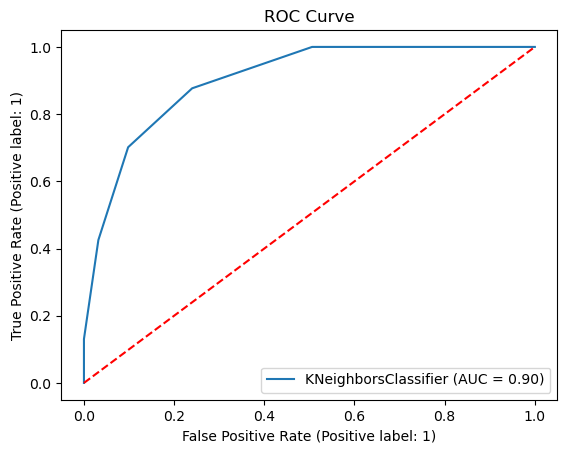

In [16]:
# Grafiği çizdirirsek;

plot_roc_curve(knn_model, X, y)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')     
# Yukarıdaki kod ortadaki kırmızı çizgiyi çizdiriyor.

plt.show()

In [17]:
# Cross validation yaparsak;

cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# "cross_validate()" fonksiyonunun içerisine;
# model nesnesi,
# bağımsız değişkenler,
# bağımlı değişkenler,
# kaç katlı cross validation yapacağımızın bilgisini,
# ve ölçüm metriklerini göndeririz.

In [18]:
# ortalama test_accuracy'e bakalım;
 
cv_results['test_accuracy'].mean()

# accuracy 0.83'ten, 0.73'e düşmüş.

0.733112638994992

In [19]:
# ortalama f1 skoruna bakalım;

cv_results['test_f1'].mean()

# f1 skoru 0.74'ten, 0.59'a düşmüş.

0.5905780011534191

In [20]:
# ortalama AUC değerine bakalım;

cv_results['test_roc_auc'].mean()

# AUC değeri 0.90'dan, 0.78'e düşmüş.

0.7805279524807827

    Bütün model değerlendirme parametrelerimizde bir düşüş olduğunu gözlemliyoruz.
    
    Aslında modeli kurduğumuz veriyi modelin performansını değerlendirmek için kullandığımızda, ortaya bir miktar yanlılık çıktığını görüyoruz. Bu yanlılık sonuçları doğru değerlendirmemizi engeller.

Cross validation çıktıları bizim için daha güvenilir çıktılardır.

In [21]:
# Bu başarı sonuçları nasıl arttırılabilir;

# 1. Örnek boyutu arttıralabilir.
# 2. Veri ön işleme
# 3. Özellik mühendisliği
# 4. İlgili algoritma için optimizasyonlar yapılabilir.

In [22]:
# Hiper parametre optimizasyonu için knn modelinin hiper parametrelerini görmek istersek;

knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

    Parametre vs. Hiperparametre Farkı

Bir modelin parametrelerinden bahsedilirken model tarafından öğrenilen değişkenleri kastedilmektedir, hiper parametreler model tarafından öğrenilmeyen modele dışarıdan kullanıcı tarafından verilen değişkenlerdir.

In [23]:
################################################
# 5. Hyperparameter Optimization
################################################

# Bu bölümde, ileri makine öğrenmesi algoritmalarında kullanılan ve 
# dışardan müdahale edilerek tanımlanan, 
# kullandığımız modellerde ön tanımlı olan hiper parametreleri optimize etmeyi göreceğiz.


# şimdi knn modelinin hiper parametrelerine bakalım;

# knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

    Örneğin, yukarıda görüldüğü üzere komşuluk sayısı'nın ön tanımlı değeri 5 olarak girilmiş. Şimdi bu komşuluk sayısını değiştirdiğimizde modelimizin nasıl değişeceğine bir bakalım.

In [24]:
# Bir sözlük oluşturalım ve komşuluk sayısını da 2 den 50'ye kadar değişken olacak şekilde değiştirelim.

knn_params = {"n_neighbors": range(2, 50)}

##### **GridSearchCV**, belirli bir model için en uygun değerleri belirlemek amacıyla hiperparametre ayarı yapmamıza yardımcı olan fonksiyondur.

In [25]:
# GridSearchCV ile hiperparametre değişikliğini inceleyelim;

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/emintaskent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/emintaskent/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [26]:
# GridSearchCV içerisine temel olarak 6 argüman alır;

# "estimator=" hiperparametrelerini kontrol etmek istediğimiz model nesnesini belirtiriz Bu case'de knn_model'dir.
# "params_grid=" denemek istediğiniz hiperparametreleri tutan sözlük nesnesidir.
# "scoring=" kullanmak istediğimiz model değerlendirme metriğini ifade ederiz.
# "cv=" denenilen her bir hiperparametre için yapılmasını istediğimiz çapraz doğrulama sayısıdır.
# "verbose=" işlem sonucunun raporunu bekleyip beklemediğimizi ifade ederiz.
# "n_jobs=" işlemcinin eşzamanlı kullanımı ile alakalıdır. 
# İşlemciyi yormamak ve başka işler de yapabilmek adına "1" değerini giriyoruz.

    Yukarıdaki future warningler'in üstünde şöyle bir ifade yer almaktadır.
        Fitting 5 folds for each of 48 candidates, totalling 240 fits

Yukarıda 48 adet denenecek hiper parametre adayı olduğu bunun sonucunda da 240 adet fit etme işlemi yapılacağı söylenmektedir.

In [27]:
# Şimdi en iyi hiper paremetreye bakarsak;

knn_gs_best.best_params_

# en az hata için komşuluk sayısının 17 olması gerekmektedir.

{'n_neighbors': 17}

In [28]:
################################################
# 6. Final Model
################################################

# Modelimizi tekrardan en iyi hiper parametre ile kuralım;

knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

In [29]:
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [30]:
# ortalama test_accuracy'e bakalım;
 
cv_results['test_accuracy'].mean()

# Bir önceki cross validation sonucunda ortaya çıkan accuracy 0.73 iken şu anda 0.76 olmuştur.

0.7669892199303965

In [31]:
# ortalama f1 skoruna bakalım;

cv_results['test_f1'].mean()

# Bir önceki cross validation sonucunda ortaya çıkan f1 skoru 0.59 iken şu anda 0.61 olmuştur.

0.6170909049720137

In [32]:
# ortalama AUC değerine bakalım;

cv_results['test_roc_auc'].mean()

# Bir önceki cross validation sonucunda ortaya çıkan auc değeri 0.78 iken şu anda 0.61 olmuştur.

0.8127938504542278

In [33]:
# rasgele bir kullanıcı seçelim;
random_user = X.sample(1)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
355,1.530847,1.380375,0.976805,-1.288212,-0.692891,-0.202129,-0.513047,1.340908


In [34]:
# seçtiğimiz kullanıcın değerini tahmin edelim;
knn_final.predict(random_user)

print(f"""tahmin sonucunda modelimiz bu kullanıcıyı "{knn_final.predict(random_user)[0]}" olarak tahmin edilmiştir.""")

tahmin sonucunda modelimiz bu kullanıcıyı "1" olarak tahmin edilmiştir.
